In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import norm
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import shapiro
from scipy.stats import kstest
from statsmodels.tsa.seasonal import STL
from scipy import special

In [2]:
df=pd.read_csv('Dummy.csv',sep=';', decimal=',', index_col='DATE', parse_dates=True, dayfirst=True)
pd.set_option('display.float_format', '{:,.2f}'.format)
print(df.shape)
df.head()

(326, 1)


,VOLUME
DATE,
2022-04-01,194.87
2022-04-02,196.06
2022-04-03,181.96
2022-04-04,201.30
2022-04-05,200.19


<Axes: xlabel='DATE'>

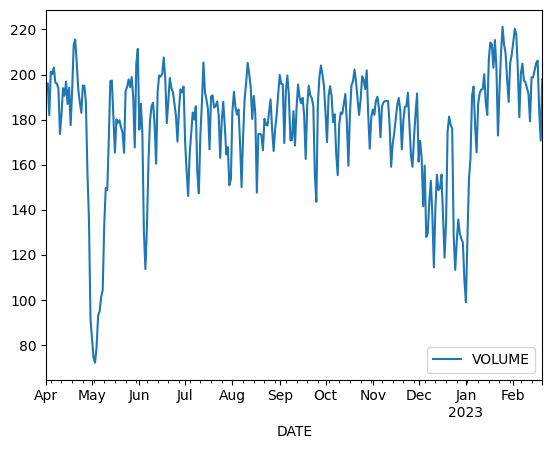

In [3]:
df.plot(y='VOLUME')

**Detecting Sesonality and Trend**

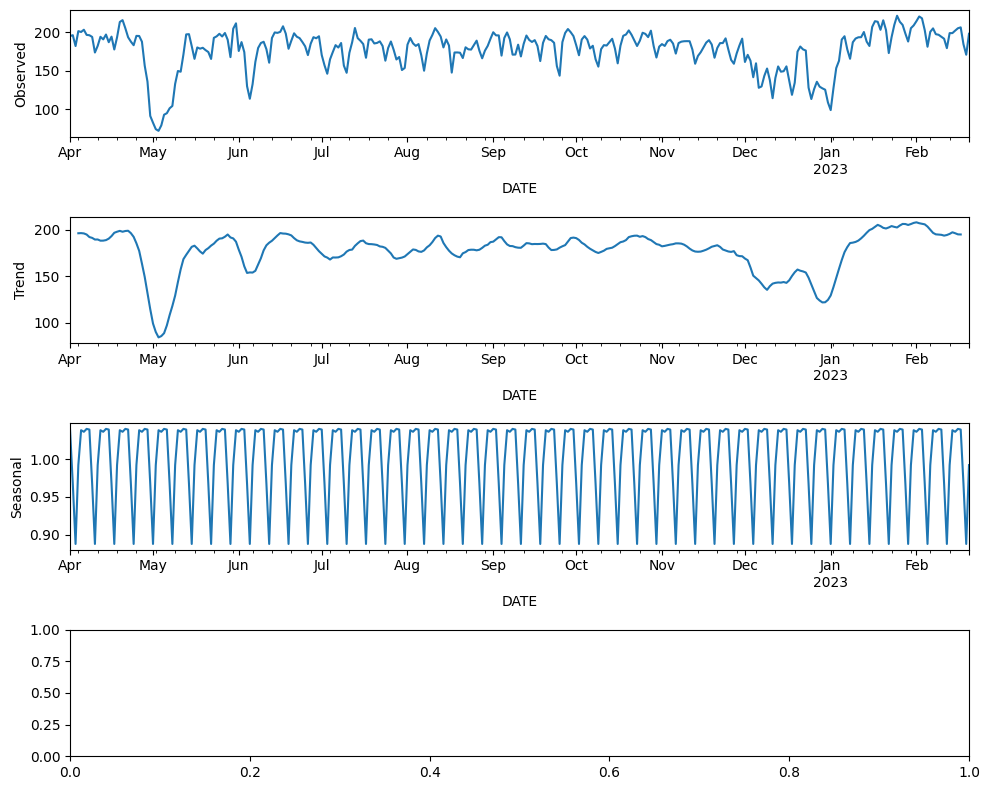

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['VOLUME'], model='multiplicative')  # Use 'multiplicative' for non linear trend

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')


plt.tight_layout()
plt.show()

**Check Stationary of Data**

In [20]:
from statsmodels.tsa.stattools import adfuller

# Assuming your time series data is stored in a variable called 'data'
result = adfuller(df)

# Extracting the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]

# Printing the test statistic and p-value
print("Test Statistic:", test_statistic)
print("p-value:", p_value)

# Hypothesis testing
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Null hypothesis rejected. The data is stationary.")
else:
    print("Failed to reject the null hypothesis. The data is non-stationary.")

Test Statistic: -3.2893711699310226
p-value: 0.015360320315414575
Null hypothesis rejected. The data is stationary.


### ACF & PACF

In [ ]:
# from statsmodels.graphics import tsaplots
# from statsmodels.graphics.tsaplots import plot_pacf
# import matplotlib.pyplot as plt


# #plot autocorrelation function
# fig = tsaplots.plot_acf(df)
# plt.show()

# #plot partial autocorrelation function (FIX THE LAGS)
# fig = tsaplots.plot_pacf(df['VOLUME'], lags=7)
# plt.show()

In [ ]:
# from statsmodels.tsa.stattools import adfuller

# def adf_test(df):
#     dftest = adfuller(df, autolag = 'AIC')
#     print("1. ADF: ", dftest[0])
#     print("2. P-Value : ", dftest[2])
#     print("3. Num Of Lags :", dftest[2])
#     print("4. Num Of Observations Used For ADF Regression:",dftest[3])
#     print("5. Critcal Values : ")
#     for key, val in dftest[4].items():
#         print("\t",key, ": ", val)
# adf_test(df)

In [ ]:
# df['DIFFERENCE'] = df['VOLUME'].diff()
# df = df.dropna()
# print(df)

In [ ]:
# df_dif = pd.DataFrame(df)
# df = df.drop('VOLUME', axis=1)
# df = df.rename(columns={'DIFFERENCE': 'VOLUME'})
# df

## **ARIMA**

In [21]:
from pmdarima import auto_arima
arima_model = auto_arima(df, 
                           seasonal=False, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4311.195, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2668.495, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2658.621, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2649.168, Time=0.53 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2653.747, Time=0.57 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=1.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2628.666, Time=1.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2626.385, Time=0.90 sec
 ARIMA(

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  326
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1308.192
Date:                Fri, 30 Jun 2023   AIC                           2626.385
Time:                        02:55:09   BIC                           2645.319
Sample:                    04-01-2022   HQIC                          2633.941
                         - 02-20-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     51.2310      8.365      6.124      0.000      34.836      67.626
ar.L1          0.2631      0.127      2.078      0.038       0.015       0.511
ar.L2          0.4493      0.115      3.914      0.000       0.224       0.674
ma.L1          0.7712      0.096      8.059      0.000       0.584       0.959
sigma2       178.2705     12.592     14.158      0.000     153.591     202.950
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.25
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.37
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(326, 1)
(296, 1) (30, 1)


In [57]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=arima_model.order)
model=model.fit()
model.summary()


c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 VOLUME   No. Observations:                  296
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1189.859
Date:                Fri, 30 Jun 2023   AIC                           2389.719
Time:                        03:33:09   BIC                           2408.171
Sample:                    04-01-2022   HQIC                          2397.107
                         - 01-21-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.9549      5.341     32.942      0.000     165.486     186.424
ar.L1          0.2960      0.142      2.089      0.037       0.018       0.574
ar.L2          0.4163      0.130      3.206      0.001       0.162       0.671
ma.L1          0.7363      0.113      6.503      0.000       0.514       0.958
sigma2       180.7068     13.142     13.750      0.000     154.949     206.465
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                15.70
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.37
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Uji Ljung-Box ARIMA

In [41]:
from scipy.stats import chi2

arima_resd = arima_model.resid()


# Print the residuals
print("Residuals:")
print(arima_resd.head())

from statsmodels.stats.diagnostic import acorr_ljungbox

alpha = 0.05

p_arima = arima_model.order[0]
d_arima = arima_model.order[1]
q_arima = arima_model.order[2]
pq = p_arima+q_arima
pq

critical_value = chi2.ppf(1 - alpha, df)

ljungbox_arima = acorr_ljungbox(arima_resd, lags=[12, 24], return_df=True)
ljungbox_arima.insert(0, 'Df (K-k)', [9, 21])
critical_value = chi2.ppf(1 - alpha, ljungbox_arima['Df (K-k)'])
ljungbox_arima.insert(2, 'X^2 table', critical_value)
ljungbox_arima.index.name = 'Lag'
ljungbox_arima


Residuals:
DATE
2022-04-01    16.77
2022-04-02     3.74
2022-04-03   -11.11
2022-04-04    22.38
2022-04-05    -2.65
dtype: float64


,Df (K-k),lb_stat,X^2 table,lb_pvalue
Lag,,,,
12,9,98.70,16.92,0.00
24,21,237.78,32.67,0.00


<Axes: xlabel='DATE'>

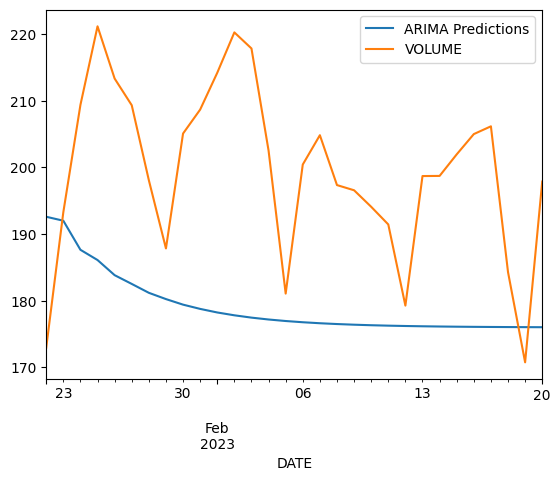

In [58]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['VOLUME'].plot(legend=True)

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Absolute Deviation (MAD)
mad = mean_absolute_error(test['VOLUME'], pred)
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['VOLUME'] - pred) / test['VOLUME'])) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['VOLUME'], pred)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Deviation (MAD): 21.922958630286185
Mean Absolute Percentage Error (MAPE): 10.740519297025825
Mean Squared Error (MSE): 592.4174889877639


## **SARIMA**

In [23]:

sarima_model = auto_arima(df, m=7, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3054.719, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2558.479, Time=0.66 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2734.965, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=4311.195, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2642.647, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=2537.951, Time=1.77 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=2555.821, Time=2.26 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=2473.900, Time=1.67 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=2587.519, Time=0.62 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=2474.266, Time=2.04 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=2574.162, Time=0.51 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.25 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=2489.4

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  326
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -1230.945
Date:                           Fri, 30 Jun 2023   AIC                           2473.890
Time:                                   03:04:09   BIC                           2496.611
Sample:                               04-01-2022   HQIC                          2482.957
                                    - 02-20-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8172      0.654      1.251      0.211      -0.464       2.098
ar.L1          0.8537      0.026     32.633      0.000       0.802       0.905
ma.L1          0.2089      0.052      4.020      0.000       0.107       0.311
ar.S.L7        0.9667      0.023     41.494      0.000       0.921       1.012
ma.S.L7       -0.8083      0.068    -11.887      0.000      -0.942      -0.675
sigma2       106.7999      5.653     18.892      0.000      95.720     117.880
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               199.11
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.78
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(326, 1)
(296, 1) (30, 1)


In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train,order=sarima_model.order,
              seasonal_order=sarima_model.seasonal_order, exog=None)
model=model.fit()
model.summary()

c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            VOLUME   No. Observations:                  296
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -1121.202
Date:                           Fri, 30 Jun 2023   AIC                           2252.403
Time:                                   03:14:26   BIC                           2270.855
Sample:                               04-01-2022   HQIC                          2259.791
                                    - 01-21-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9287      0.022     41.634      0.000       0.885       0.972
ma.L1          0.1229      0.057      2.173      0.030       0.012       0.234
ar.S.L7        1.0000      0.001   1207.567      0.000       0.998       1.002
ma.S.L7       -0.9923      0.226     -4.397      0.000      -1.435      -0.550
sigma2       102.4806     21.219      4.830      0.000      60.892     144.069
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               185.18
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.79
Prob(H) (two-sided):                  0.05   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
from scipy.stats import chi2

arima_resd = sarima_model.resid()


# Print the residuals
print("Residuals:")
print(arima_resd.head())

from statsmodels.stats.diagnostic import acorr_ljungbox

alpha = 0.05

p_arima = sarima_model.order[0]
d_arima = sarima_model.order[1]
q_arima = sarima_model.order[2]
pq = p_arima+q_arima
pq

critical_value = chi2.ppf(1 - alpha, df)

ljungbox_arima = acorr_ljungbox(arima_resd, lags=[12, 24], return_df=True)
ljungbox_arima.insert(0, 'Df (K-k)', [9, 21])
critical_value = chi2.ppf(1 - alpha, ljungbox_arima['Df (K-k)'])
ljungbox_arima.insert(2, 'X^2 table', critical_value)
ljungbox_arima.index.name = 'Lag'
ljungbox_arima


Residuals:
DATE
2022-04-01    27.25
2022-04-02     3.17
2022-04-03   -11.93
2022-04-04    22.18
2022-04-05    -2.33
dtype: float64


,Df (K-k),lb_stat,X^2 table,lb_pvalue
Lag,,,,
12,9,21.30,16.92,0.05
24,21,41.14,32.67,0.02


<Axes: xlabel='DATE'>

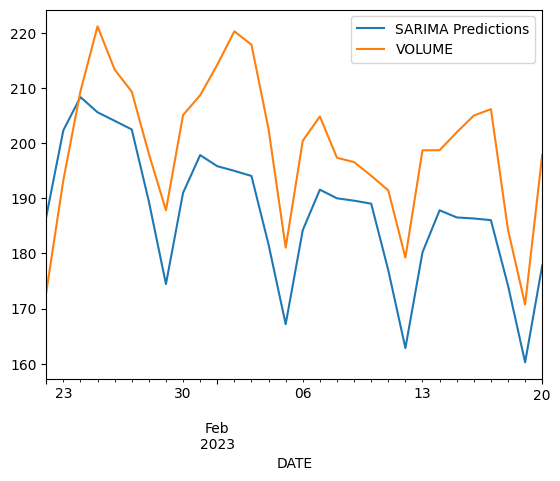

In [49]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('SARIMA Predictions')
pred.plot(legend=True)
test['VOLUME'].plot(legend=True)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Absolute Deviation (MAD)
mad = mean_absolute_error(test['VOLUME'], pred)
print("Mean Absolute Deviation (MAD):", mad)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['VOLUME'] - pred) / test['VOLUME'])) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['VOLUME'], pred)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Deviation (MAD): 13.63938495951592
Mean Absolute Percentage Error (MAPE): 6.824596746791024
Mean Squared Error (MSE): 217.24194788995612


In [62]:
from statsmodels.tsa.holtwinters import Holt

# Fitting Holt's Exponential Smoothing on the training data
model = Holt(train)
fitted_model = model.fit()

# Forecasting with Holt's Exponential Smoothing
forecast = fitted_model.forecast(len(test))

# Calculating Mean Absolute Deviation (MAD)
mad = mean_absolute_error(test['VOLUME'], forecast)
print("Mean Absolute Deviation (MAD):", mad)

# Calculating Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['VOLUME'] - forecast) / test['VOLUME'])) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(test['VOLUME'], forecast)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Deviation (MAD): 10.413954654556205
Mean Absolute Percentage Error (MAPE): 5.42054042551742
Mean Squared Error (MSE): 181.51303597352262


c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


c:\Users\rizki\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


NameError: name 'testa' is not defined

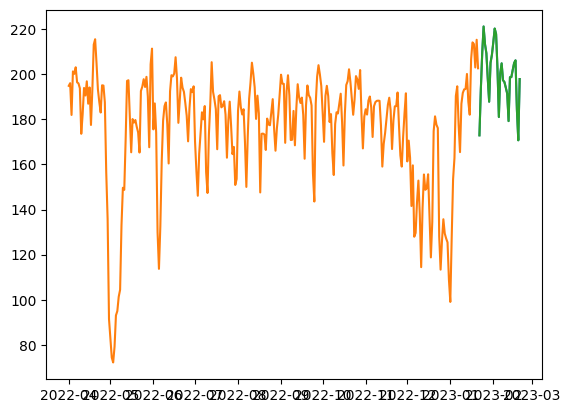

In [69]:
# Fitting Holt's Exponential Smoothing on the training data
model = Holt(train)
fitted_model = model.fit()

# Forecasting with Holt's Exponential Smoothing
forecast = fitted_model.forecast(len(test))

# Plotting the train and test data
plt.plot(test.index, test['VOLUME'], label='Data')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(testa.index, forecast, label='Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Training and Testing Data')
plt.show()